# Hotel Booking Demand Analysis & Cancelation prediction
### Data Science Use case for Pre Interview Exercise for Data Science position at PETRONAS Digital 

##### Objective
<a id = '0'></a>

* Q1. **Provide various descriptive analytics and insights**
    * [Quick check on overall EDA](#1.0)
    * [EDA on Relationship Between Target Variable and Categorical Variables](#1.1)
    * [EDA on Relationship Between Target Variable and Numerical Variables](#1.2)
    * [Insight](#1.3)
    
* Q2. **Suggest the use cases suitable here from the perspective of the hotel owner?**
    * [Use cases suitable here from the perspective of the hotel owner](#1.3)
    * [Suggestion for hotel to improve their cancelation rate](#1.3)

* Q3. **Suggest the use cases suitable here from the perspective of the guests?**
    * [Use cases suitable here from the perspective of the guests](#3.0)
    * [Suggestion for guests to get the best daily rate](#3.1)
    
* Q4. **Develop a model to predict bookings cancellation and explain the model as well as it’s output.**
    * [Machine Learning Model to Predict Bookings Cancellation](#4.0)
    * [Conclusion - The best ML model](#4.1)
    

# 0. Import necessary Packages

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [108]:
data = pd.read_csv('hotel_bookings.csv')
data.head().T

0             1             2  \
hotel                           Resort Hotel  Resort Hotel  Resort Hotel   
is_canceled                                0             0             0   
lead_time                                342           737             7   
arrival_date_year                       2015          2015          2015   
arrival_date_month                      July          July          July   
arrival_date_week_number                  27            27            27   
arrival_date_day_of_month                  1             1             1   
stays_in_weekend_nights                    0             0             0   
stays_in_week_nights                       0             0             1   
adults                                     2             2             1   
children                                 0.0           0.0           0.0   
babies                                     0             0             0   
meal                                      BB            BB            BB   
country                                  PRT           PRT           GBR   
market_segment                        Direct        Direct        Direct   
distribution_channel                  Direct        Direct        Direct   
is_repeated_guest                          0             0             0   
previous_cancellations                     0             0             0   
previous_bookings_not_canceled             0             0             0   
reserved_room_type                         C             C             A   
assigned_room_type                         C             C             C   
booking_changes                            3             4             0   
deposit_type                      No Deposit    No Deposit    No Deposit   
agent                                    NaN           NaN           NaN   
company                                  NaN           NaN           NaN   
days_in_waiting_list                       0             0             0   
customer_type                      Transient     Transient     Transient   
adr                                      0.0           0.0          75.0   
required_car_parking_spaces                0             0             0   
total_of_special_requests                  0             0             0   
reservation_status                 Check-Out     Check-Out     Check-Out   
reservation_status_date           2015-07-01    2015-07-01    2015-07-02   

                                           3             4  
hotel                           Resort Hotel  Resort Hotel  
is_canceled                                0             0  
lead_time                                 13            14  
arrival_date_year                       2015          2015  
arrival_date_month                      July          July  
arrival_date_week_number                  27            27  
arrival_date_day_of_month                  1             1  
stays_in_weekend_nights                    0             0  
stays_in_week_nights                       1             2  
adults                                     1             2  
children                                 0.0           0.0  
babies                                     0             0  
meal                                      BB            BB  
country                                  GBR           GBR  
market_segment                     Corporate     Online TA  
distribution_channel               Corporate         TA/TO  
is_repeated_guest                          0             0  
previous_cancellations                     0             0  
previous_bookings_not_canceled             0             0  
reserved_room_type                         A             A  
assigned_room_type                         A             A  
booking_changes                            0             0  
deposit_type                      No Deposit    No Deposit  
agent                                  304.0         240.0  
company  

In [109]:
data.shape

(119390, 32)

In [110]:
data.describe().T

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

In [111]:
data.describe(include='object').T

count unique         top    freq
hotel                    119390      2  City Hotel   79330
arrival_date_month       119390     12      August   13877
meal                     119390      5          BB   92310
country                  118902    177         PRT   48590
market_segment           119390      8   Online TA   56477
distribution_channel     119390      5       TA/TO   97870
reserved_room_type       119390     10           A   85994
assigned_room_type       119390     12           A   74053
deposit_type             119390      3  No Deposit  104641
customer_type            119390      4   Transient   89613
reservation_status       119390      3   Check-Out   75166
reservation_status_date  119390    926  2015-10-21    1461

In [112]:
#Number of unique values for reserved_room_type & assigned_room_type is not tally?
print('Unique values for reserved_room_type: ', data['reserved_room_type'].unique())
print('Unique values for assigned_room_type: ', data['assigned_room_type'].unique())

Unique values for reserved_room_type:  ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values for assigned_room_type:  ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 2. Data Cleaning

Checking the existance of missing values, the type of variables, or integrity of data. 

### 2.1. Checking for missing value

In [114]:
# Checking for missing value in each columns
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [115]:
null_columns=data.columns[data.isnull().any()]
null_columns

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [116]:
# Replace the missing value in Children column with mean of the children column
data['children'].fillna((data["children"].mean()), inplace = True)

# Replace the missing value in country column with "Others"
data["country"].fillna("others", inplace = True)

# Remove entries with missing value for agent column
data = data.dropna(subset = ['agent'])

# Remove company column due to too much missing value & not relevent in our analysis 
data = data.drop('company',axis =1)

data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [117]:
data.shape

(103050, 31)

### 2.2. Check data for duplicate rows and remove the duplicate


In [118]:
#Check data for duplicate rows and remove the duplicate
duplicates = data.duplicated()
duplicates.sum()

27850

In [119]:
data=data.drop_duplicates()
data.shape

(75200, 31)

In [120]:
#We have negative value at adr column. Illogical thus remove the entries.
data_negative_adr = data[data.adr<1.0]
data_negative_adr.shape

(895, 31)

In [121]:
data.drop(data[data.adr<1.0].index,inplace=True)
data.shape

(74305, 31)

# 3. Exploratory Data Analysis (EDA)

### 3.1. Quick check on overall EDA
<a id = '1.0'></a>

In [14]:
# Quick check on overall EDA before go into more details

import quick_eda
from quick_eda.df_eda import df_eda

df_eda(data)

Head of dataframe:

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
3                        27                          1   
4                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
3                        0                     1       1  ...   
4             

There are 0 duplicated rows in the dataframe.
- - - - - - - - - - - - - - - - - - - - - - - -

Number of occuring NULL/NA values per column:

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                         

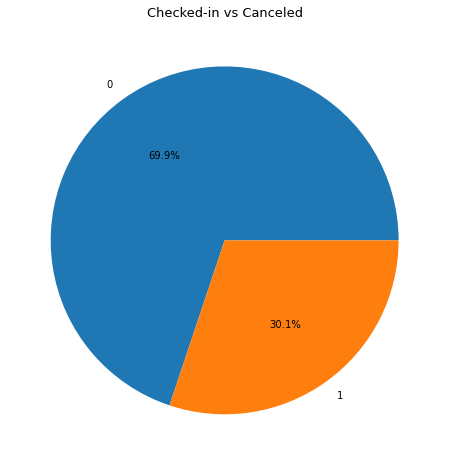

In [15]:
# Explore the target variable.

labels = data.is_canceled.value_counts().index
sizes = data.is_canceled.value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Checked-in vs Canceled',color = 'black',fontsize = 13);

In [16]:
# The target variable is imbalance, 70% vs 30%. 
# However still acceptable. Not required to perform Undersampling (NearMiss) and Oversampling (SMOTE).

<a id = '1.1'></a>
### 3.2. EDA on Relationship Between Target Variable and Categorical Variables

In [472]:
data.describe(include='object').T

count unique         top   freq
hotel                    74305      2  City Hotel  47332
arrival_date_month       74305     12      August  10139
meal                     74305      5          BB  56306
country                  74305    175         PRT  18951
market_segment           74305      7   Online TA  50951
distribution_channel     74305      5       TA/TO  67151
reserved_room_type       74305      8           A  47050
assigned_room_type       74305     10           A  39907
deposit_type             74305      3  No Deposit  73423
customer_type            74305      4   Transient  62028
reservation_status       74305      3   Check-Out  51914
reservation_status_date  74305    922  2016-03-28    181

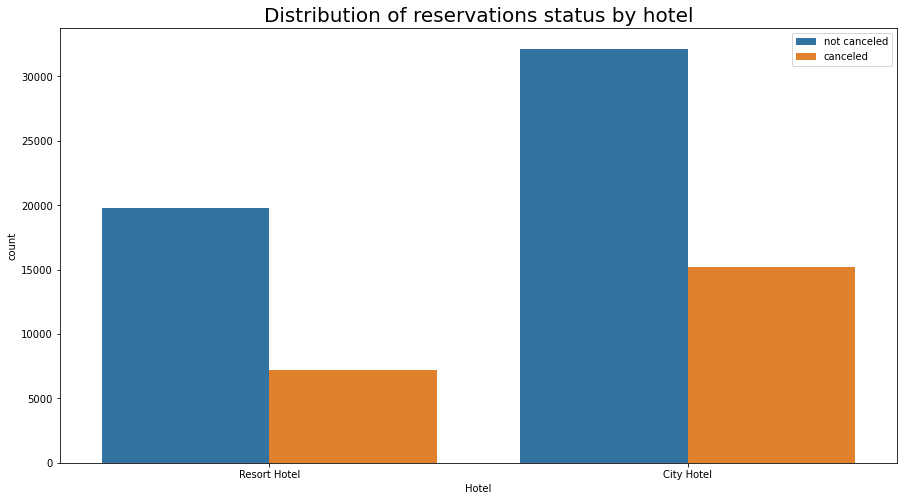

In [17]:
# Distribution of reservations status by hotel.
plt.figure(figsize=(15,8))
g=sns.countplot(x='hotel', data=data, hue='is_canceled')
plt.xlabel('Hotel')
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of reservations status by hotel', fontsize=20)
plt.show()

In [18]:
# There are more cancellations in the City hotel.
# For better comparison, compare the cancel rate of the city hotel and the resort hotel

cancel_rate = data.groupby(["hotel","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate.groupby("hotel")['rate'].transform("sum")
cancel_rate['rate'] = cancel_rate['rate'].div(summe)
cancel_rate

hotel  is_canceled      rate
0    City Hotel            0  0.679519
1    City Hotel            1  0.320481
2  Resort Hotel            0  0.732251
3  Resort Hotel            1  0.267749

In [475]:
#The cancel rate for city hotel(32%) is higher than resort hotel(27%). Not really a significant difference

In [19]:
# Distribution of reservations status by country. Visualize using pie charts due to too many unique variables.

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

data_country =  data['country'].value_counts().to_frame().reset_index()
data_country.rename(columns = {'index' : 'country', 'country' : 'guest_count'}, inplace=True)
fig.add_trace(go.Pie(labels = data_country['country'].values.tolist(), 
                     values = data_country['guest_count'].values.tolist(), 
                     title = 'Total Bookings Across Countries'), 1, 1)

hotel_booking_checkedin =  data[data['is_canceled'] == 0]['country'].value_counts().to_frame().reset_index()
hotel_booking_checkedin.rename(columns = {'index' : 'country', 'country' : 'guest_count_confirmed'}, inplace=True)
fig.add_trace(go.Pie(labels = hotel_booking_checkedin['country'].values.tolist(), 
                     values = hotel_booking_checkedin['guest_count_confirmed'].values.tolist(), 
                     title = 'Total checked-in Across Countries'), 1, 2)

hotel_booking_canceled =  data[data['is_canceled'] == 1]['country'].value_counts().to_frame().reset_index()
hotel_booking_canceled.rename(columns = {'index' : 'country', 'country' : 'guest_count_canceled'}, inplace=True)
fig.add_trace(go.Pie(labels = hotel_booking_canceled['country'].values.tolist(), 
                    values = hotel_booking_canceled['guest_count_canceled'].values.tolist(), 
                    title = 'Total Canceled Bookings Across Countries'), 1, 3)

fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))

In [20]:
# Ranking of country with high rate of cancelation

cancel_rate = data.groupby(["country","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate.groupby("country")['rate'].transform("sum")
cancel_rate['rate'] = cancel_rate['rate'].div(summe)
cancel_rate.drop(cancel_rate[cancel_rate.is_canceled==0].index,inplace=True)
cancel_rate.drop(cancel_rate[cancel_rate.rate==1].index,inplace=True)
cancel_rate.sort_values("rate",ascending=False)


country  is_canceled      rate
115     HKG            1  0.913043
169     MAC            1  0.900000
9       ARE            1  0.891304
226     QAT            1  0.833333
33      BHR            1  0.800000
..      ...          ...       ...
163     LTU            1  0.102941
206     NZL            1  0.068966
62      CRI            1  0.066667
242     SRB            1  0.057692
290  others            1  0.032000

[116 rows x 3 columns]

In [21]:
# Hong Kong, Macao, United Arab Emirates are top 3 with highest number of canceled bookings.

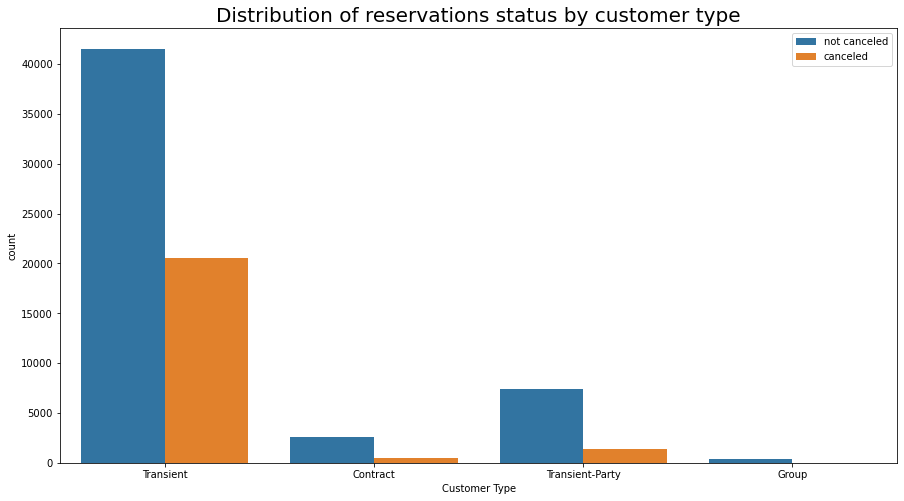

In [22]:
# Distribution of reservations status by customer type

plt.figure(figsize=(15,8))
g=sns.countplot(data=data, x='customer_type', hue='is_canceled')
plt.xlabel('Customer Type')
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of reservations status by customer type', fontsize=20)
plt.show()

In [23]:
#For better comparison, compare the cancel rate of each customer type

cancel_rate = data.groupby(["customer_type","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate.groupby("customer_type")['rate'].transform("sum")
cancel_rate['rate'] = cancel_rate['rate'].div(summe)
cancel_rate

customer_type  is_canceled      rate
0         Contract            0  0.835480
1         Contract            1  0.164520
2            Group            0  0.931034
3            Group            1  0.068966
4        Transient            0  0.669665
5        Transient            1  0.330335
6  Transient-Party            0  0.844322
7  Transient-Party            1  0.155678

In [24]:
#The cancel rate for Transient type of customer is significantly high with 33% is canceled.

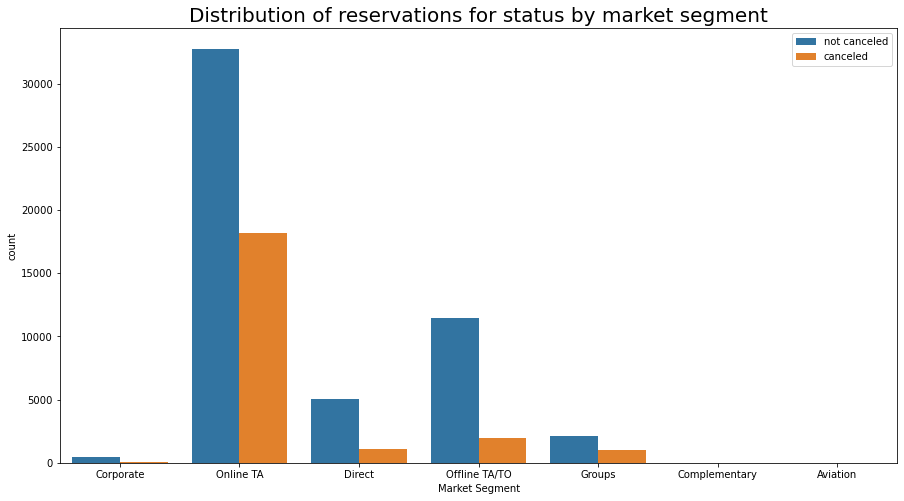

In [25]:
# Distribution of reservations status by market segment

plt.figure(figsize=(15,8))
g=sns.countplot(data=data, x='market_segment', hue='is_canceled')
plt.xlabel('Market Segment')
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of reservations for status by market segment', fontsize=20)
plt.show()

In [26]:
#For better comparison, compare the cancel rate of each market segment

cancel_rate = data.groupby(["market_segment","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate.groupby("market_segment")['rate'].transform("sum")
cancel_rate['rate'] = cancel_rate['rate'].div(summe)
cancel_rate

market_segment  is_canceled      rate
0        Aviation            0  0.791667
1        Aviation            1  0.208333
2   Complementary            0  1.000000
3       Corporate            0  0.822394
4       Corporate            1  0.177606
5          Direct            0  0.823653
6          Direct            1  0.176347
7          Groups            0  0.674882
8          Groups            1  0.325118
9   Offline TA/TO            0  0.852446
10  Offline TA/TO            1  0.147554
11      Online TA            0  0.642990
12      Online TA            1  0.357010

In [27]:
#The cancel rate for Online TA and Groups are significantly high with 36% and 33% respectively are canceled.

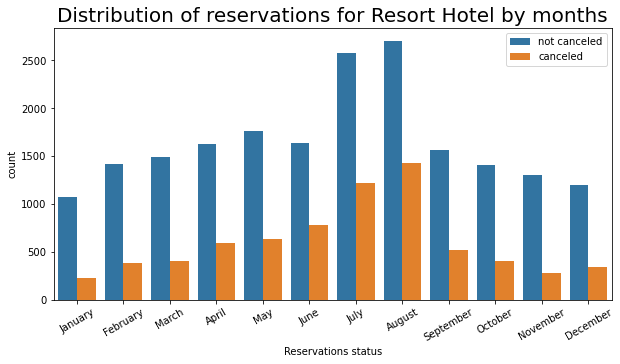

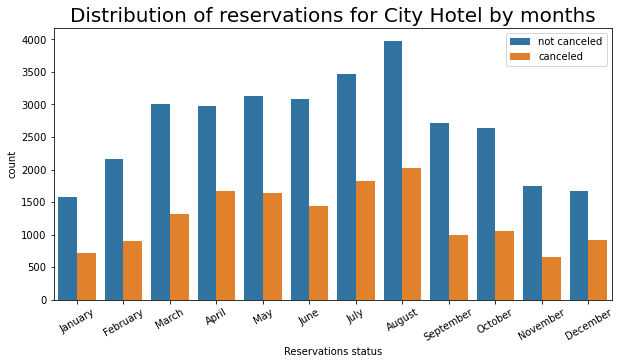

In [28]:
# Distribution of reservations status by month of year. We divide the data into resort hotel and city hotel
# because the number of bookings for both resort hotel and city hotel are significantly difference if compare by month of year
# eg. Resort hotel will have more bookings during the summer.

hotel_resort = data[data['hotel'] == 'Resort Hotel']
hotel_city = data[data['hotel'] == 'City Hotel']

plt.figure(figsize=(10,5))
g=sns.countplot(data=hotel_resort, x='arrival_date_month',order=['January','February','March','April','May','June','July','August','September','October','November','December'], hue='is_canceled')
plt.xlabel('Reservations status')
plt.xticks(rotation=30)
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of reservations for Resort Hotel by months', fontsize=20)
plt.show()

plt.figure(figsize=(10,5))
g=sns.countplot(data=hotel_city, x='arrival_date_month',order=['January','February','March','April','May','June','July','August','September','October','November','December'], hue='is_canceled')
plt.xlabel('Reservations status')
plt.xticks(rotation=30)
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of reservations for City Hotel by months', fontsize=20)
plt.show()

In [29]:
cancel_rate_resort = hotel_resort.groupby(["arrival_date_month","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate_resort.groupby("arrival_date_month")['rate'].transform("sum")
cancel_rate_resort['rate'] = cancel_rate_resort['rate'].div(summe)
cancel_rate_resort.drop(cancel_rate_resort[cancel_rate_resort.is_canceled==0].index,inplace=True)
print('Cancel rate for Resort Hotel\n')
print(cancel_rate_resort)

print()

cancel_rate_city = hotel_city.groupby(["arrival_date_month","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate_city.groupby("arrival_date_month")['rate'].transform("sum")
cancel_rate_city['rate'] = cancel_rate_city['rate'].div(summe)
cancel_rate_city.drop(cancel_rate_city[cancel_rate_city.is_canceled==0].index,inplace=True)
print('Cancel rate for City Hotel\n')
print(cancel_rate_city)


Cancel rate for Resort Hotel

   arrival_date_month  is_canceled      rate
1               April            1  0.268381
3              August            1  0.346228
5            December            1  0.224093
7            February            1  0.213014
9             January            1  0.174847
11               July            1  0.320770
13               June            1  0.323249
15              March            1  0.213909
17                May            1  0.264497
19           November            1  0.175016
21            October            1  0.223140
23          September            1  0.250000

Cancel rate for City Hotel

   arrival_date_month  is_canceled      rate
1               April            1  0.359819
3              August            1  0.337665
5            December            1  0.353763
7            February            1  0.296248
9             January            1  0.312772
11               July            1  0.345537
13               June            1  0.318

In [30]:
# We can see that there are some seasonality during the years, which is normal in hospitality, specially in Resort Hotel, which get more bookings in the summer.

# Also cancellations rate are higher in Spring and Summer and have a lowest cancellations rate in the winter. So we can clearly star to see some patterns.

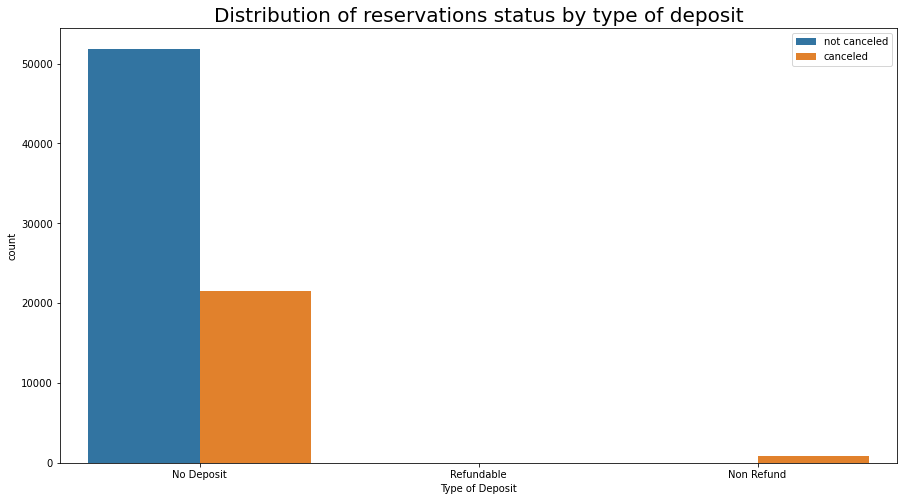

In [31]:
# Distribution of reservations status by type of deposit

plt.figure(figsize=(15,8))
g=sns.countplot(data=data, x='deposit_type', hue='is_canceled')
plt.xlabel('Type of Deposit')
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of reservations status by type of deposit', fontsize=20)
plt.show()

In [32]:
# Not a good comparison since the data are imbalance.

print(data["deposit_type"].value_counts())

data.groupby(["deposit_type","is_canceled"]).size()

No Deposit    73423
Non Refund      846
Refundable       36
Name: deposit_type, dtype: int64


deposit_type  is_canceled
No Deposit    0              51877
              1              21546
Non Refund    0                 21
              1                825
Refundable    0                 16
              1                 20
dtype: int64

In [33]:
#For better comparison, compare the cancel rate of each type of deposit

cancel_rate = data.groupby(["deposit_type","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate.groupby("deposit_type")['rate'].transform("sum")
cancel_rate['rate'] = cancel_rate['rate'].div(summe)
cancel_rate

deposit_type  is_canceled      rate
0   No Deposit            0  0.706550
1   No Deposit            1  0.293450
2   Non Refund            0  0.024823
3   Non Refund            1  0.975177
4   Refundable            0  0.444444
5   Refundable            1  0.555556

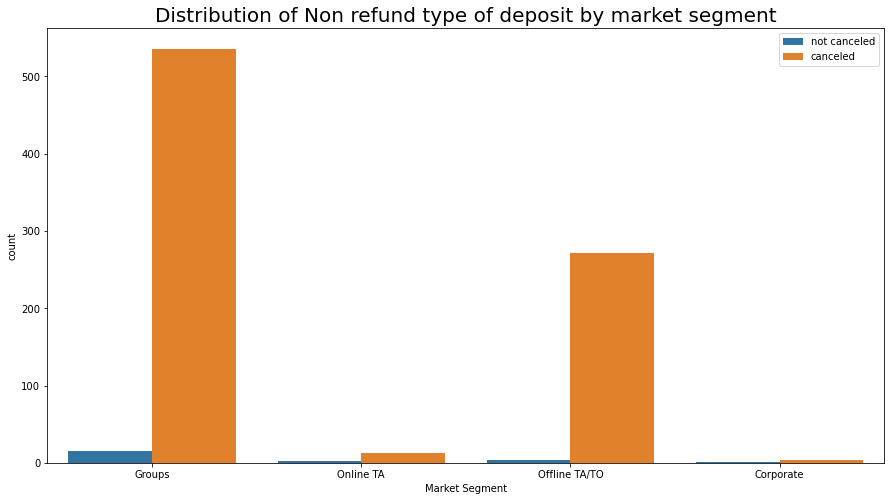

In [34]:
# The cancelation rate is very high when hotels implement Non refund type of deposit.
# It is not logical conclusion poeple are tent to cancel their booking with non refundable deposit.
# Need further investigation into why it happened.
# visualize the distribution of Non refund type of deposit by market segment. 

data_non_refund = data[data.deposit_type == 'Non Refund']

plt.figure(figsize=(15,8))
g=sns.countplot(data=data_non_refund, x='market_segment', hue='is_canceled')
plt.xlabel('Market Segment')
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of Non refund type of deposit by market segment', fontsize=20)
plt.show()

In [35]:
data_non_refund.groupby(['market_segment']).size()

market_segment
Corporate          5
Groups           551
Offline TA/TO    275
Online TA         15
dtype: int64

In [36]:
cancel_rate = data_non_refund.groupby(["market_segment","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate.groupby("market_segment")['rate'].transform("sum")
cancel_rate['rate'] = cancel_rate['rate'].div(summe)
cancel_rate

market_segment  is_canceled      rate
0      Corporate            0  0.200000
1      Corporate            1  0.800000
2         Groups            0  0.027223
3         Groups            1  0.972777
4  Offline TA/TO            0  0.010909
5  Offline TA/TO            1  0.989091
6      Online TA            0  0.133333
7      Online TA            1  0.866667

In [37]:
# Most of bookings with non refund type of deposit is coming from Groups and Offline TA/TO.
# 98% & 97% of booking from Offline TA/TO and Group have canceled their bookings. 
# Very huge percentage, need further investigation into why it happened.

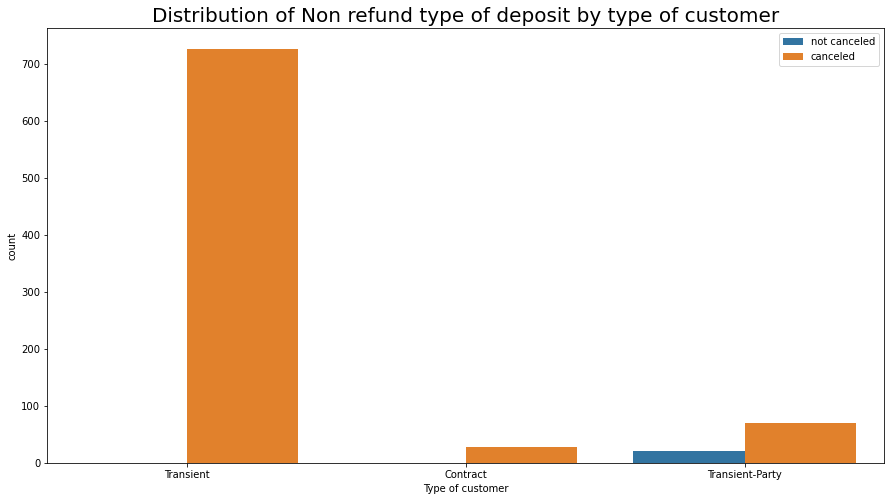

In [38]:
# visualize the distribution of Non refund type of deposit by type of customer. 
data_non_refund = data[data.deposit_type == 'Non Refund']

plt.figure(figsize=(15,8))
g=sns.countplot(data=data_non_refund, x='customer_type', hue='is_canceled')
plt.xlabel('Type of customer')
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of Non refund type of deposit by type of customer', fontsize=20)
plt.show()

In [39]:
print(data_non_refund.groupby(['customer_type']).size(), '\n')

data.groupby(['customer_type']).size()

customer_type
Contract            28
Transient          727
Transient-Party     91
dtype: int64 



customer_type
Contract            3106
Group                435
Transient          62028
Transient-Party     8736
dtype: int64

In [40]:
# Most of bookings with non refund type of deposit is coming from Transient. 
# Not much information here since Transient also a big portion of overall data.

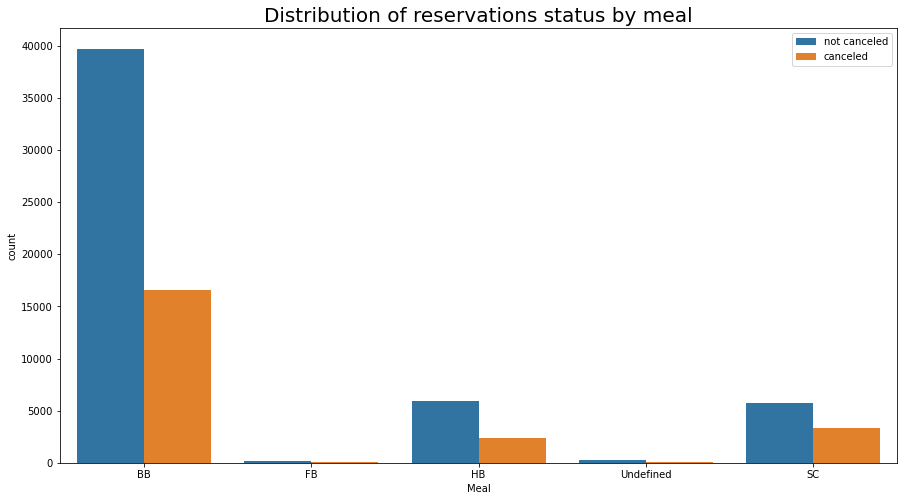

In [41]:
# Distribution of reservations status by meal 

plt.figure(figsize=(15,8))
g=sns.countplot(data=data, x='meal', hue='is_canceled')
plt.xlabel('Meal')
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of reservations status by meal', fontsize=20)
plt.show()

In [42]:
#For better comparison, compare the cancel rate of each type of meal

cancel_rate = data.groupby(["meal","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate.groupby("meal")['rate'].transform("sum")
cancel_rate['rate'] = cancel_rate['rate'].div(summe)
cancel_rate

meal  is_canceled      rate
0         BB            0  0.705307
1         BB            1  0.294693
2         FB            0  0.718213
3         FB            1  0.281787
4         HB            0  0.717006
5         HB            1  0.282994
6         SC            0  0.635171
7         SC            1  0.364829
8  Undefined            0  0.826979
9  Undefined            1  0.173021

In [43]:
# The cancel rate for SC meal are significantly high with 36% are canceled.

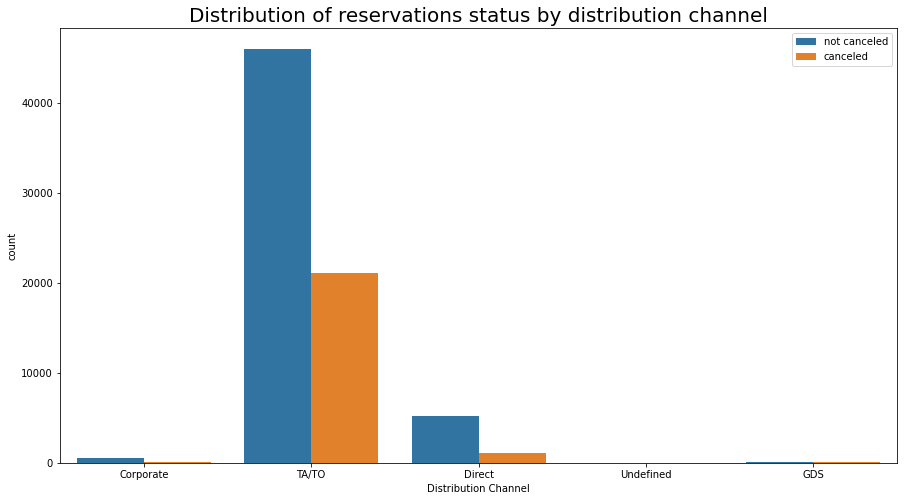

In [44]:
# Distribution of reservations status by distribution channel.

plt.figure(figsize=(15,8))
g=sns.countplot(data=data, x='distribution_channel', hue='is_canceled')
plt.xlabel('Distribution Channel')
plt.legend(['not canceled','canceled'], loc = 0)
plt.title('Distribution of reservations status by distribution channel', fontsize=20)
plt.show()

In [45]:
data.groupby(['distribution_channel']).size()

distribution_channel
Corporate      688
Direct        6289
GDS            175
TA/TO        67151
Undefined        2
dtype: int64

In [46]:
#For better comparison, compare the cancel rate each of distribution channel

cancel_rate = data.groupby(["distribution_channel","is_canceled"]).size().reset_index(name='rate')
summe = cancel_rate.groupby("distribution_channel")['rate'].transform("sum")
cancel_rate['rate'] = cancel_rate['rate'].div(summe)
cancel_rate

distribution_channel  is_canceled      rate
0            Corporate            0  0.825581
1            Corporate            1  0.174419
2               Direct            0  0.822547
3               Direct            1  0.177453
4                  GDS            0  0.794286
5                  GDS            1  0.205714
6                TA/TO            0  0.685530
7                TA/TO            1  0.314470
8            Undefined            1  1.000000

In [47]:
# The cancel rate for TA/TO distribution channel are significantly high with 31% are canceled.

<a id = '1.2'></a>
### 3.3.  EDA on Relationship Between Target Variable and Numerical Variables

In [505]:
data.describe().T

count         mean         std     min  \
is_canceled                     74305.0     0.301339    0.458843     0.0   
lead_time                       74305.0    87.167553   85.779090     0.0   
arrival_date_year               74305.0  2016.229312    0.681281  2015.0   
arrival_date_week_number        74305.0    26.886293   13.345378     1.0   
arrival_date_day_of_month       74305.0    15.798506    8.845481     1.0   
stays_in_weekend_nights         74305.0     1.076603    1.027546     0.0   
stays_in_week_nights            74305.0     2.767835    2.024372     0.0   
adults                          74305.0     1.928686    0.474153     0.0   
children                        74305.0     0.149616    0.472456     0.0   
babies                          74305.0     0.010551    0.113650     0.0   
is_repeated_guest               74305.0     0.012220    0.109867     0.0   
previous_cancellations          74305.0     0.019555    0.317039     0.0   
previous_bookings_not_canceled  74305.0     0.032071    0.502022     0.0   
booking_changes                 74305.0     0.244896    0.686328     0.0   
agent                           74305.0    93.916587  113.105176     1.0   
days_in_waiting_list            74305.0     0.792585   10.500332     0.0   
adr                             74305.0   111.448459   53.363329     1.0   
required_car_parking_spaces     74305.0     0.072996    0.261628     0.0   
total_of_special_requests       74305.0     0.742023    0.833138     0.0   

                                    25%     50%     75%     max  
is_canceled                        0.00     0.0     1.0     1.0  
lead_time                         18.00    60.0   134.0   629.0  
arrival_date_year               2016.00  2016.0  2017.0  2017.0  
arrival_date_week_number          16.00    27.0    36.0    53.0  
arrival_date_day_of_month          8.00    16.0    24.0    31.0  
stays_in_weekend_nights            0.00     1.0     2.0    16.0  
stays_in_week_nights               1.00     2.0     4.0    41.0  
adults                             2.00     2.0     2.0     4.0  
children                           0.00     0.0     0.0    10.0  
babies                             0.00     0.0     0.0    10.0  
is_repeated_guest                  0.00     0.0     0.0     1.0  
previous_cancellations             0.00     0.0     0.0    26.0  
previous_bookings_not_canceled     0.00     0.0     0.0    50.0  
booking_changes                    0.00     0.0     0.0    18.0  
agent                              9.00    14.0   240.0   535.0  
days_in_waiting_list               0.00     0.0     0.0   391.0  
adr                               76.84   102.6   137.7  5400.0  
required_car_parking_spaces        0.00     0.0     0.0     3.0  
total_of_special_requests          0.00     1.0     1.0     5.0

In [122]:
NumCols = list(set(['is_canceled','lead_time','arrival_date_year','arrival_date_week_number',
                    'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
                    'adults','children','babies','is_repeated_guest','previous_cancellations',
                    'previous_bookings_not_canceled','booking_changes','agent','days_in_waiting_list',
                    'adr','required_car_parking_spaces','total_of_special_requests']))

In [123]:
data['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 50, 15], dtype=int64)

----------------------------------------------------------------------------------------------
stays_in_week_nights


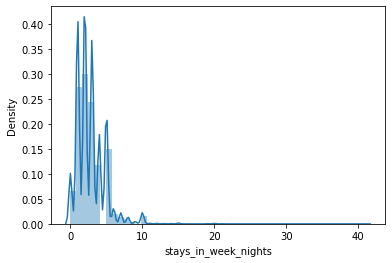

----------------------------------------------------------------------------------------------
stays_in_weekend_nights


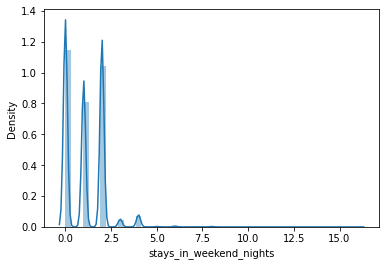

----------------------------------------------------------------------------------------------
previous_bookings_not_canceled


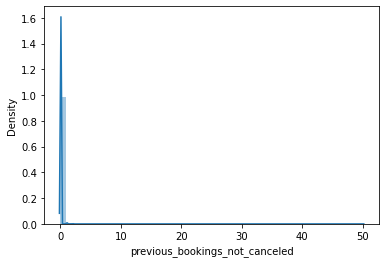

----------------------------------------------------------------------------------------------
adr


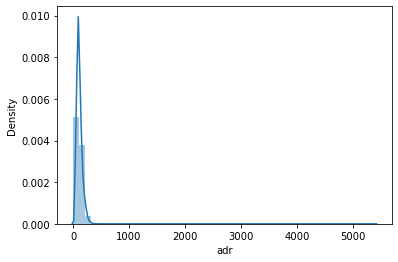

----------------------------------------------------------------------------------------------
arrival_date_year


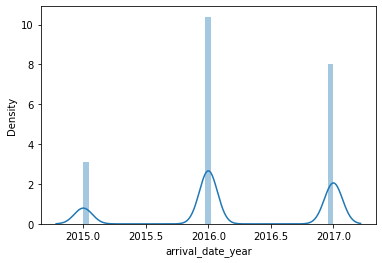

----------------------------------------------------------------------------------------------
adults


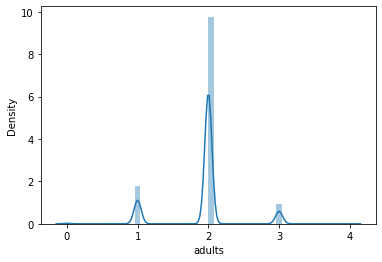

----------------------------------------------------------------------------------------------
total_of_special_requests


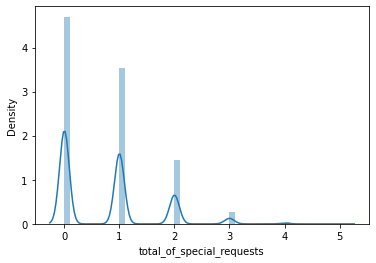

----------------------------------------------------------------------------------------------
arrival_date_week_number


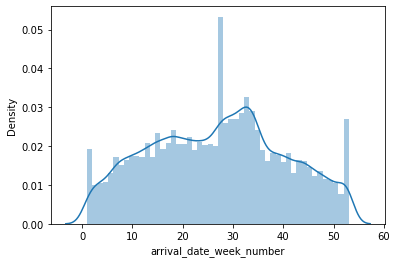

----------------------------------------------------------------------------------------------
is_repeated_guest


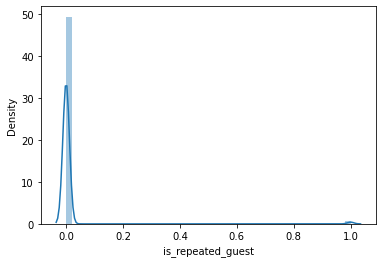

----------------------------------------------------------------------------------------------
required_car_parking_spaces


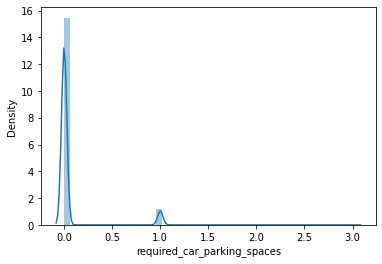

----------------------------------------------------------------------------------------------
babies


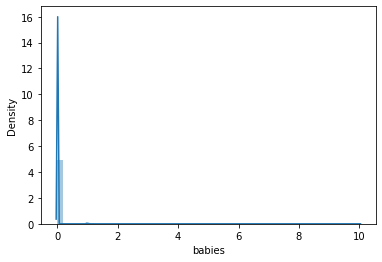

----------------------------------------------------------------------------------------------
children


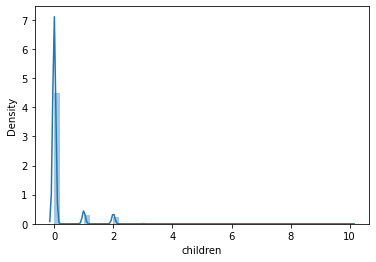

----------------------------------------------------------------------------------------------
days_in_waiting_list


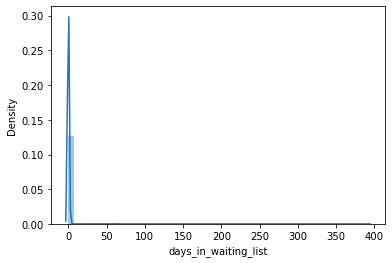

----------------------------------------------------------------------------------------------
agent


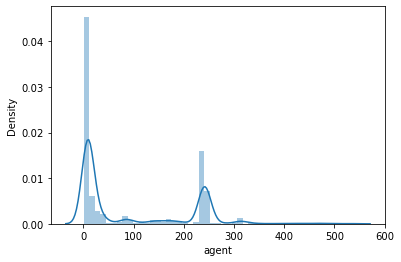

----------------------------------------------------------------------------------------------
lead_time


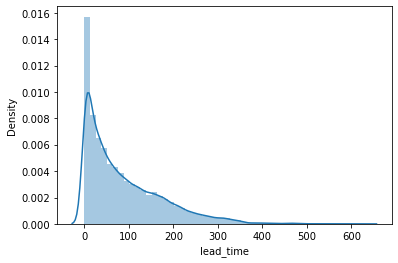

----------------------------------------------------------------------------------------------
arrival_date_day_of_month


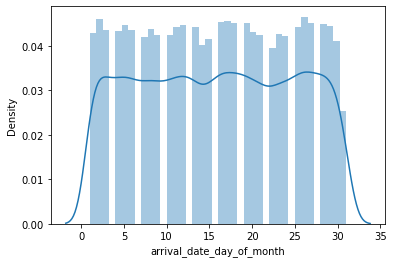

----------------------------------------------------------------------------------------------
is_canceled


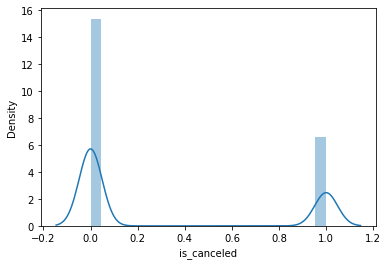

----------------------------------------------------------------------------------------------
booking_changes


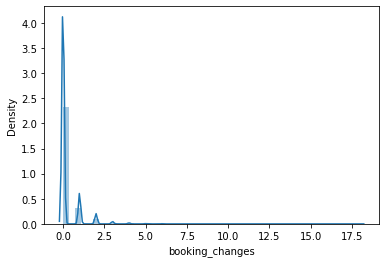

----------------------------------------------------------------------------------------------
previous_cancellations


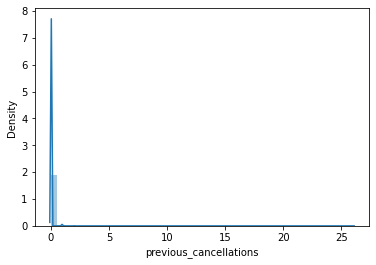

In [50]:
for column in NumCols:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    sns.distplot(data[column])
    plt.show()

----------------------------------------------------------------------------------------------
stays_in_week_nights


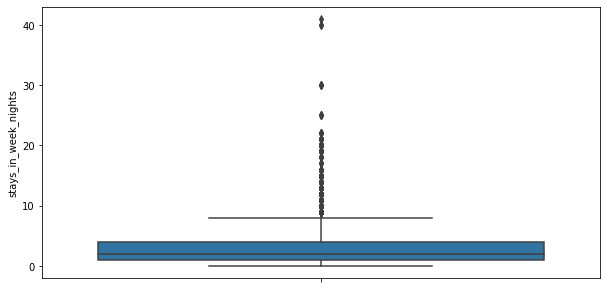

----------------------------------------------------------------------------------------------
stays_in_weekend_nights


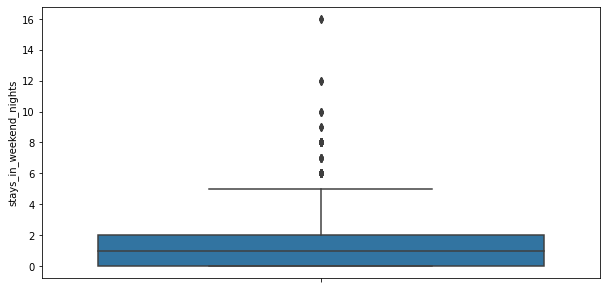

----------------------------------------------------------------------------------------------
previous_bookings_not_canceled


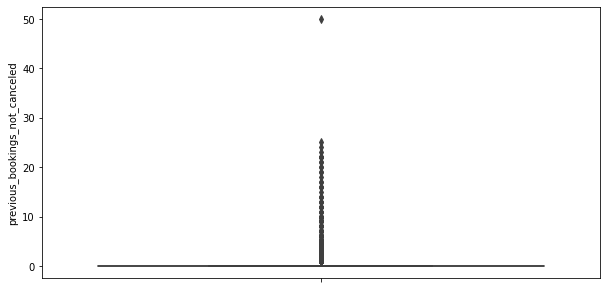

----------------------------------------------------------------------------------------------
adr


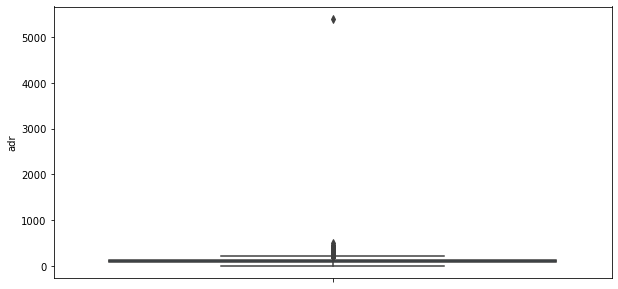

----------------------------------------------------------------------------------------------
arrival_date_year


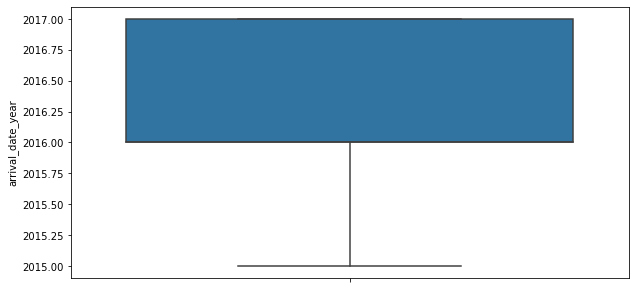

----------------------------------------------------------------------------------------------
adults


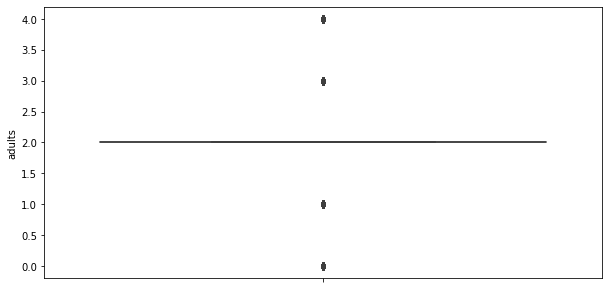

----------------------------------------------------------------------------------------------
total_of_special_requests


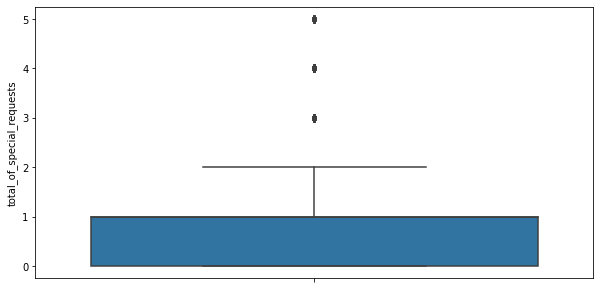

----------------------------------------------------------------------------------------------
arrival_date_week_number


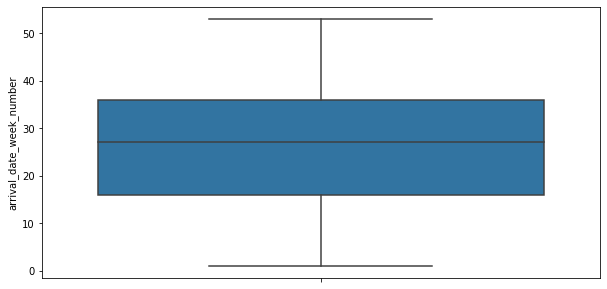

----------------------------------------------------------------------------------------------
is_repeated_guest


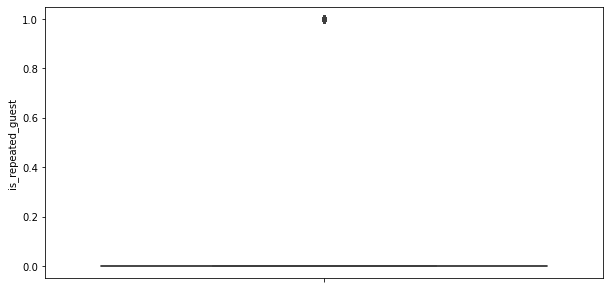

----------------------------------------------------------------------------------------------
required_car_parking_spaces


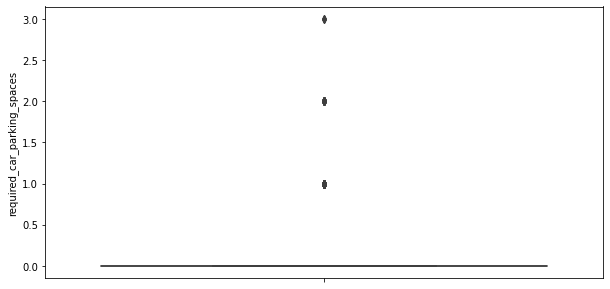

----------------------------------------------------------------------------------------------
babies


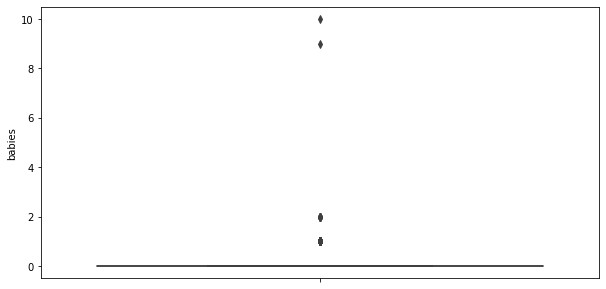

----------------------------------------------------------------------------------------------
children


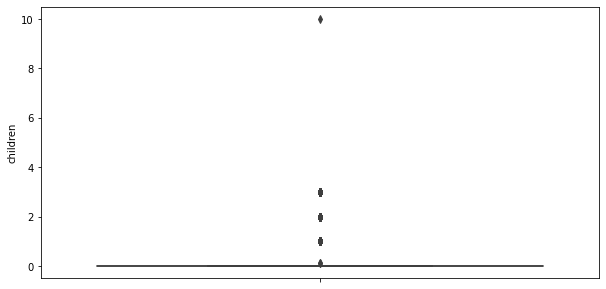

----------------------------------------------------------------------------------------------
days_in_waiting_list


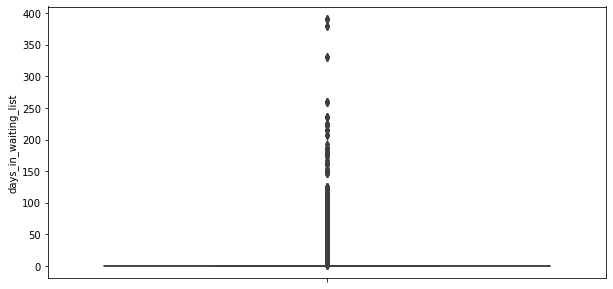

----------------------------------------------------------------------------------------------
agent


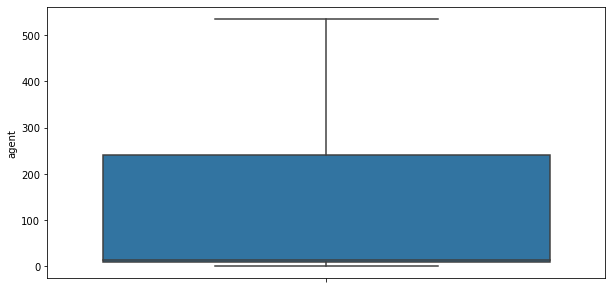

----------------------------------------------------------------------------------------------
lead_time


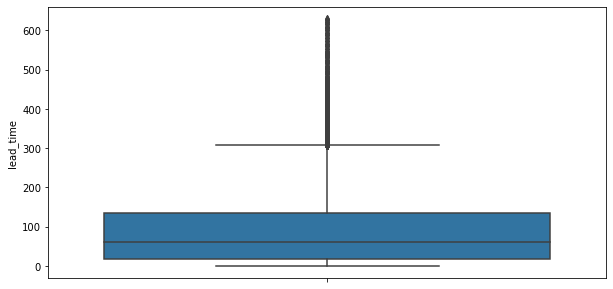

----------------------------------------------------------------------------------------------
arrival_date_day_of_month


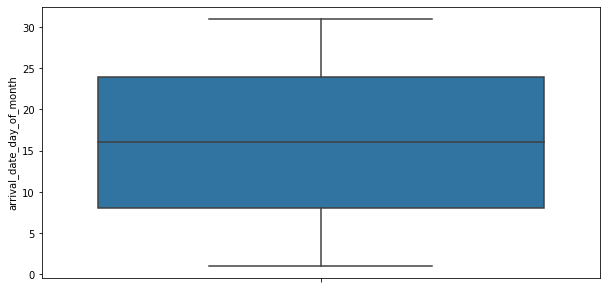

----------------------------------------------------------------------------------------------
is_canceled


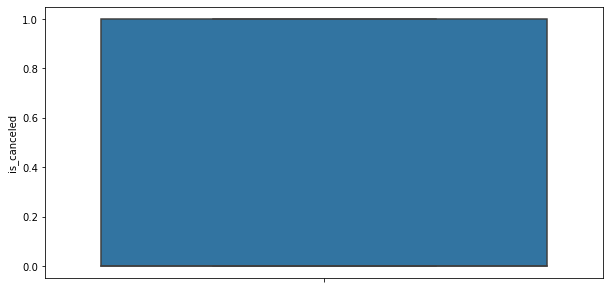

----------------------------------------------------------------------------------------------
booking_changes


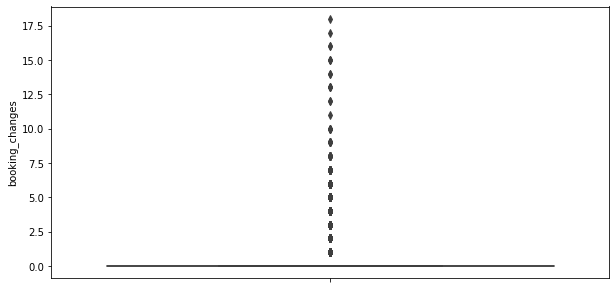

----------------------------------------------------------------------------------------------
previous_cancellations


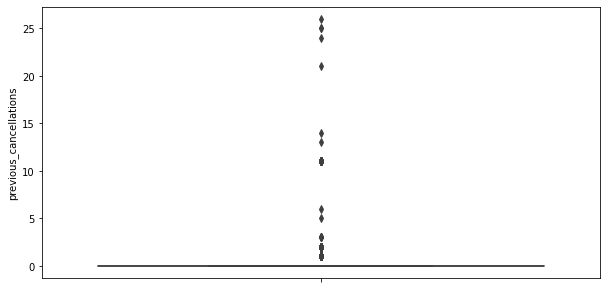

In [124]:
for column in NumCols:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data, y=column)
    plt.show()

In [510]:
# From the boxplot, we can see the data has a lot of outliers

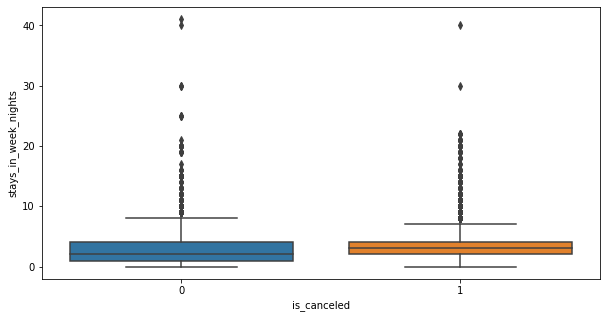

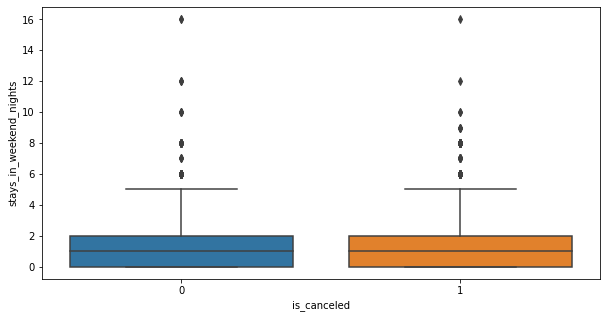

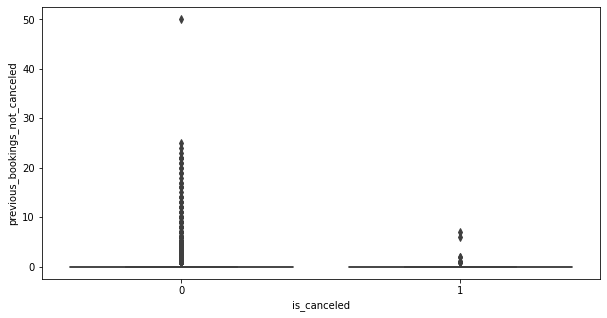

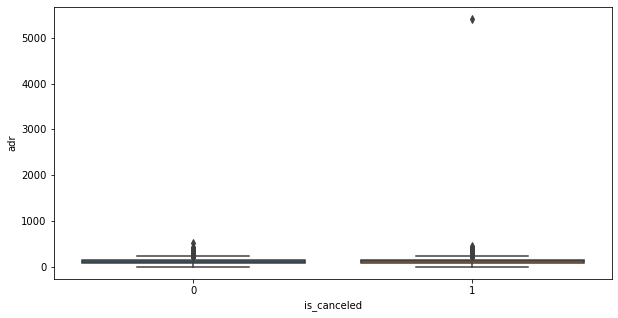

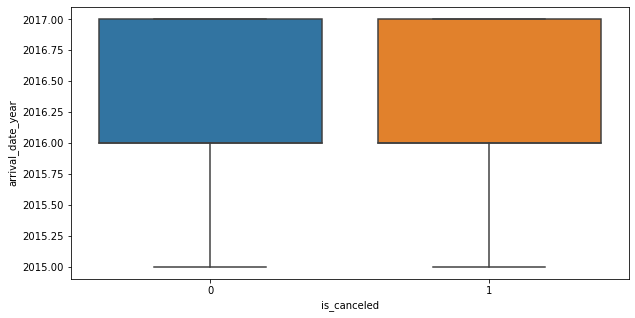

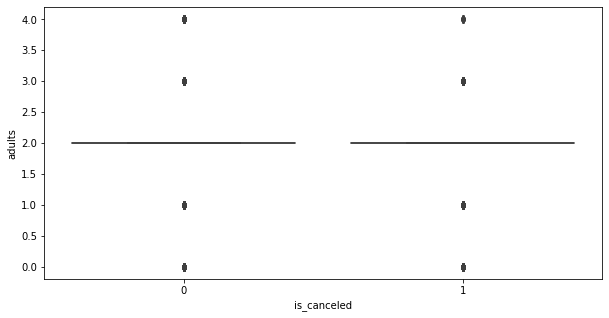

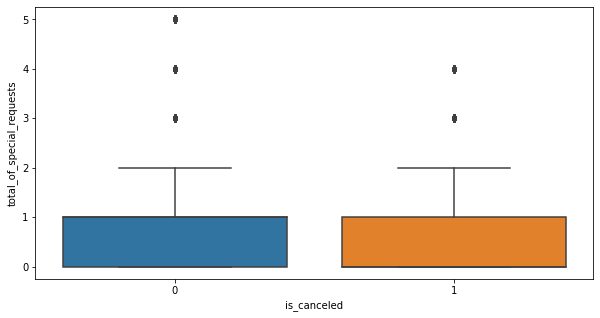

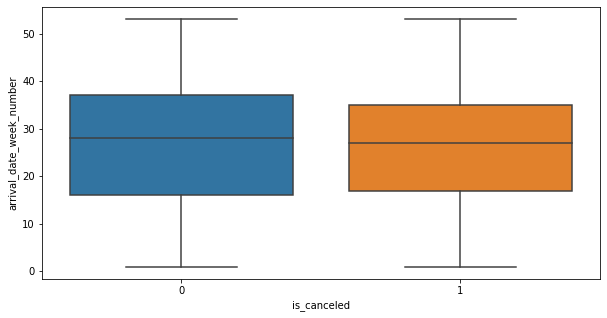

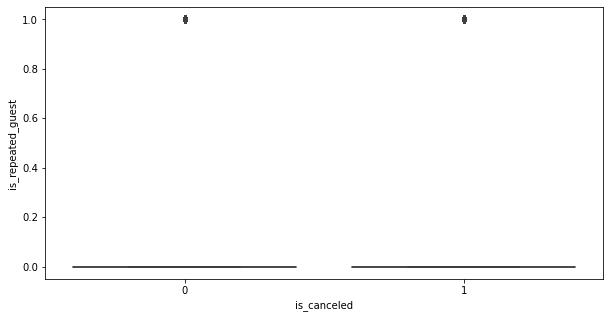

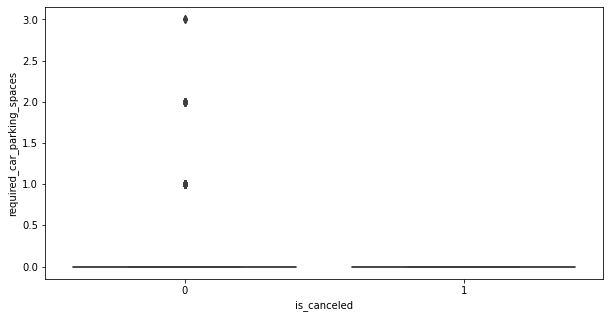

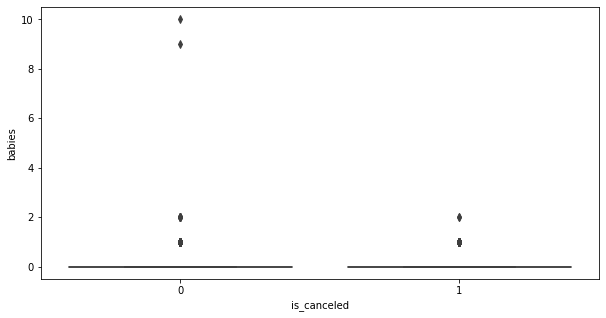

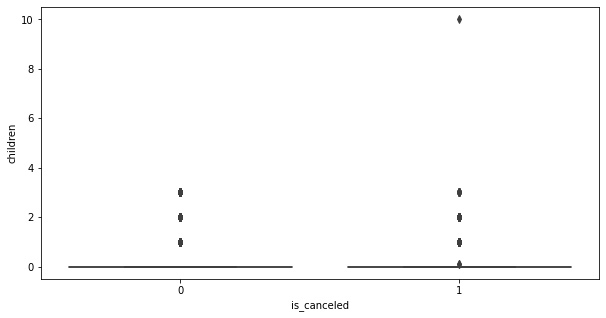

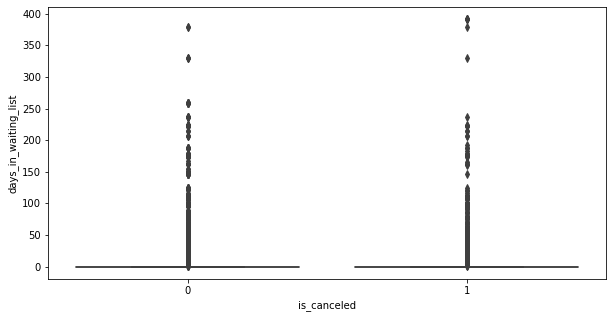

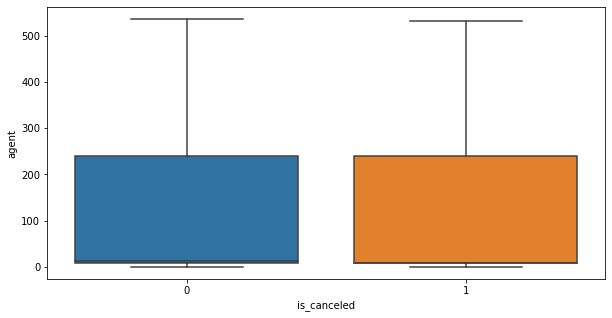

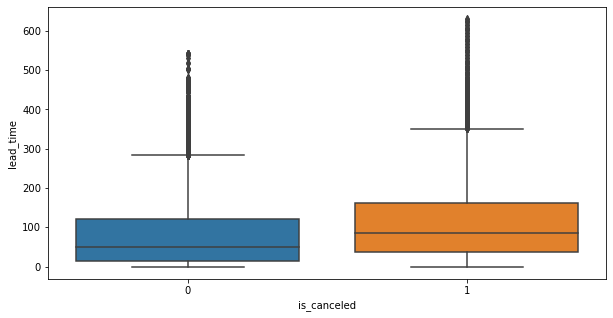

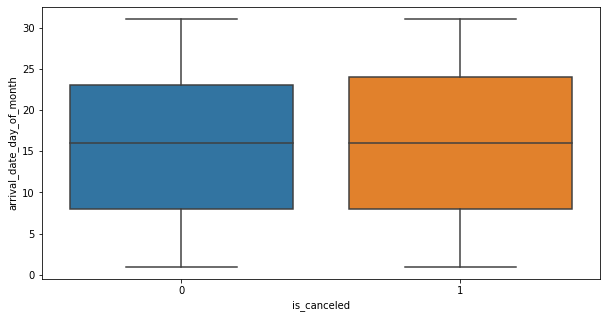

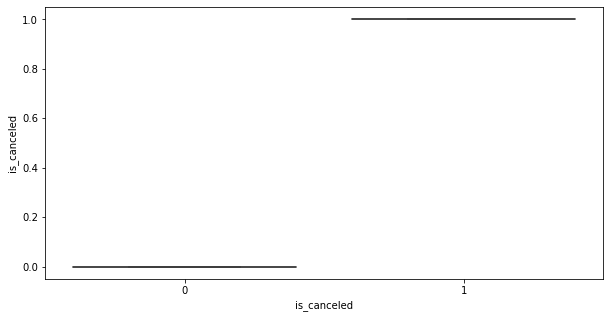

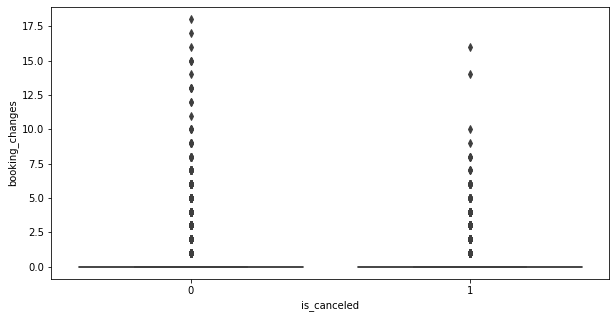

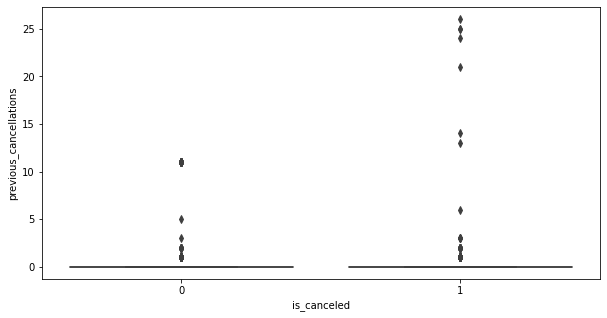

In [125]:
for column in NumCols:
    plt.figure(figsize=(10,5))  
    sns.boxplot(x=data.is_canceled , y=data[column], data=data);

<a id = '1.3'></a>
### 3.4.  Insight

* Hong Kong, Macao, United Arab Emirates are top 3 with highest number of canceled bookings.
* We can see that there are some seasonality during the years, which is normal in hospitality, specially in Resort Hotel, which get more bookings in the summer.
    * The cancellations rate are higher in Spring and Summer and have a lowest cancellations rate in the winter. So we can clearly star to see some patterns.
* The cancelation rate is very high when hotels implement Non refund type of deposit. 
    * It is not logical conclusion people are likely to cancel their booking with non refundable deposit. 
    * Visualize the distribution of Non refund type of deposit by market segment shown that most of bookings with non refund type of deposit is coming from Groups and Offline TA/TO.
    * 98% & 97% of booking from Offline TA/TO and Group have canceled their bookings. 
    * Very huge percentage, need further investigation into why it happened.
* The cancel rate for Transient type of customer is significantly high with 33% is canceled.
* The cancel rate for market segment Online TA and Groups are significantly high with 36% and 33% respectively are canceled.
* The cancel rate for SC meal are significantly high with 36% are canceled.
* The cancel rate for TA/TO distribution channel are significantly high with 31% are canceled.
* From the boxplot, we can see the data has a lot of outliers

<a id = '3.0'></a>
### 3.5. Use cases suitable here from the perspective of the guests

### Explore the relationship between the columns and try to answer the following questions:

#### Question 1 : When is the best time of the year to book a hotel room?


In [53]:
data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [54]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   81.801048
1              August  184.222685
2            December   62.108431
3            February   56.786233
4             January   51.801162
5                July  152.886321
6                June  111.122327
7               March   59.999296
8                 May   81.560079
9            November   51.321929
10            October   66.595518
11          September   98.906744

In [55]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  116.858352
1              August  127.011899
2            December   95.102797
3            February   91.566514
4             January   87.262295
5                July  123.899942
6                June  124.451339
7               March   93.553165
8                 May  128.887056
9            November   93.072547
10            October  109.547657
11          September  121.110778

In [56]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

month  price_for_resort  price_for_city_hotel
0       April         81.801048            116.858352
1      August        184.222685            127.011899
2    December         62.108431             95.102797
3    February         56.786233             91.566514
4     January         51.801162             87.262295
5        July        152.886321            123.899942
6        June        111.122327            124.451339
7       March         59.999296             93.553165
8         May         81.560079            128.887056
9    November         51.321929             93.072547
10    October         66.595518            109.547657
11  September         98.906744            121.110778

In [57]:
import plotly.express as px

plt.figure(figsize = (15,8))

px.line(final_hotel, x = 'month' , y = ['price_for_resort','price_for_city_hotel'], 
        title = 'Room price per night over the Months')

<Figure size 1080x576 with 0 Axes>

#### Answer 1 : The best time of the year to book a hotel room with the lowest price is during the winter (November, December, January and February)

#### Question 2: What is the optimal length of stay in order to get the best daily rate?

In [58]:
data_checkedin = data[data['is_canceled'] == 0]
data_checkedin.head()

hotel  is_canceled  lead_time  arrival_date_year  \
3   Resort Hotel            0         13               2015   
4   Resort Hotel            0         14               2015   
7   Resort Hotel            0          9               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
3                July                        27                          1   
4                July                        27                          1   
7                July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
3                         0                     1       1  ...   
4                         0                     2       2  ...   
7                         0                     2       2  ...   
11                        0                     4       2  ...   
12                        0                     4       2  ...   

    booking_changes  deposit_type  agent days_in_waiting_list customer_type  \
3                 0    No Deposit  304.0                    0     Transient   
4                 0    No Deposit  240.0                    0     Transient   
7                 0    No Deposit  303.0                    0     Transient   
11                0    No Deposit  240.0                    0     Transient   
12                0    No Deposit  240.0                    0     Transient   

      adr  required_car_parking_spaces  total_of_special_requests  \
3    75.0                            0                          0   
4    98.0                            0                          1   
7   103.0                            0                          1   
11  145.0                            0                          0   
12   97.0                            0                          3   

    reservation_status reservation_status_date  
3            Check-Out              2015-07-02  
4            Check-Out              2015-07-03  
7            Check-Out              2015-07-03  
11           Check-Out              2015-07-05  
12           Check-Out              2015-07-05  

[5 rows x 31 columns]

In [65]:
data_checkedin['total_nights'] = data_checkedin['stays_in_weekend_nights'] + data_checkedin['stays_in_week_nights']

data_resort_stay = data_checkedin[(data_checkedin['hotel'] == 'Resort Hotel')]
data_city_stay = data_checkedin[(data_checkedin['hotel'] == 'City Hotel') ]

In [67]:
resort_hotel_stay = data_resort_stay.groupby(['total_nights'])['adr'].mean().reset_index()
resort_hotel_stay.head()

total_nights         adr
0             1   79.509502
1             2   99.743970
2             3  102.709465
3             4  105.645662
4             5  115.866914

In [68]:
city_hotel_stay=data_city_stay.groupby(['total_nights'])['adr'].mean().reset_index()
city_hotel_stay.head()

total_nights         adr
0             1  117.325491
1             2  115.923167
2             3  112.484471
3             4  109.031714
4             5  108.282959

In [69]:
final_hotel_stay = resort_hotel_stay.merge(city_hotel_stay, on = 'total_nights')
final_hotel_stay.columns = ['total_nights', 'price_for_resort', 'price_for_city_hotel']
final_hotel_stay

total_nights  price_for_resort  price_for_city_hotel
0              1         79.509502            117.325491
1              2         99.743970            115.923167
2              3        102.709465            112.484471
3              4        105.645662            109.031714
4              5        115.866914            108.282959
5              6        125.075583            110.139356
6              7         98.843014            109.979252
7              8        110.909804            108.520286
8              9        111.308673            116.902745
9             10         99.738621            108.269701
10            11        102.546528            109.342083
11            12        100.744304            101.428800
12            13         95.603448             97.197000
13            14         85.594506            108.663333
14            15         87.380625             78.693333
15            16         91.035455            119.417500
16            17         92.054444            127.790000
17            18         93.038000            110.000000
18            19         68.910000             75.000000
19            22         75.874000             95.200000

<Figure size 1080x576 with 0 Axes>

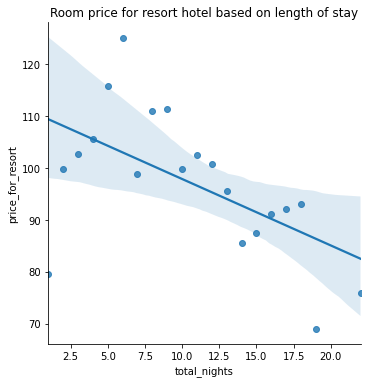

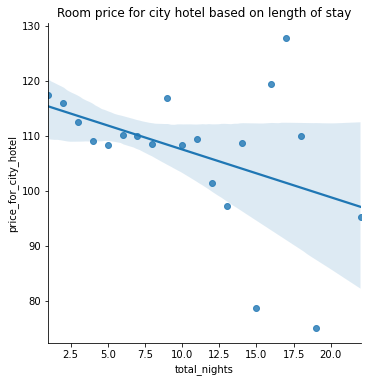

In [94]:
plt.figure(figsize = (15,8))

sns.lmplot(data=final_hotel_stay, x = 'total_nights' , y= 'price_for_resort')
plt.title('Room price for resort hotel based on length of stay')
plt.show()


sns.lmplot(data=final_hotel_stay, x = 'total_nights' , y= 'price_for_city_hotel')
plt.title('Room price for city hotel based on length of stay')
plt.show()

#### Answer 2 : The longer the length of stay, the cheaper the daily rate

<a id = '3.1'></a>

### Suggestion for guests to get the best daily rate

* The best time of the year to book a hotel room with the lowest price is during the winter (November, December, January and February)
* Stay longer of night to get a cheaper price


# 4. Data Pre Processing

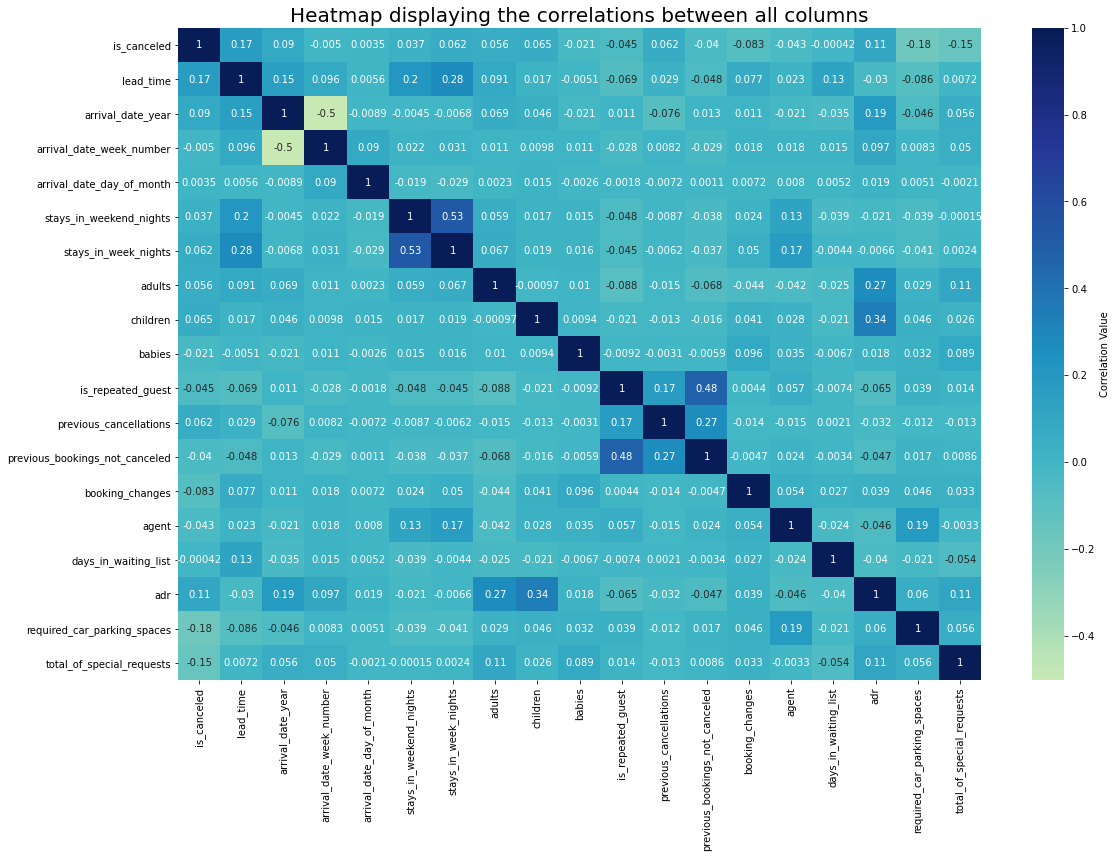

In [96]:
#Check Correlation between Numerical Variables

plt.figure(figsize=(18, 12))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(data.corr(),center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

In [97]:
corr = data.corr()['is_canceled'].abs().sort_values(ascending = False)
corr

is_canceled                       1.000000
required_car_parking_spaces       0.183237
lead_time                         0.170210
total_of_special_requests         0.151369
adr                               0.106458
arrival_date_year                 0.089613
booking_changes                   0.082714
children                          0.065320
previous_cancellations            0.062277
stays_in_week_nights              0.062192
adults                            0.055661
is_repeated_guest                 0.045282
agent                             0.043204
previous_bookings_not_canceled    0.040436
stays_in_weekend_nights           0.037102
babies                            0.021485
arrival_date_week_number          0.004980
arrival_date_day_of_month         0.003490
days_in_waiting_list              0.000424
Name: is_canceled, dtype: float64

In [98]:
#To transform categorical columns to numerical dummy data
columns = list(data.columns)

Cat_cols=[]
for i in columns:
    if data[i].dtype=='object':
        Cat_cols.append(i)
Cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [99]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Cat_cols:
    data[i]=le.fit_transform(data[i])
data.head().T

3       4       7       8       9
hotel                              1.0     1.0     1.0     1.0     1.0
is_canceled                        0.0     0.0     0.0     1.0     1.0
lead_time                         13.0    14.0     9.0    85.0    75.0
arrival_date_year               2015.0  2015.0  2015.0  2015.0  2015.0
arrival_date_month                 5.0     5.0     5.0     5.0     5.0
arrival_date_week_number          27.0    27.0    27.0    27.0    27.0
arrival_date_day_of_month          1.0     1.0     1.0     1.0     1.0
stays_in_weekend_nights            0.0     0.0     0.0     0.0     0.0
stays_in_week_nights               1.0     2.0     2.0     3.0     3.0
adults                             1.0     2.0     2.0     2.0     2.0
children                           0.0     0.0     0.0     0.0     0.0
babies                             0.0     0.0     0.0     0.0     0.0
meal                               0.0     0.0     1.0     0.0     2.0
country                           59.0    59.0   134.0   134.0   134.0
market_segment                     2.0     6.0     3.0     6.0     5.0
distribution_channel               0.0     3.0     1.0     3.0     3.0
is_repeated_guest                  0.0     0.0     0.0     0.0     0.0
previous_cancellations             0.0     0.0     0.0     0.0     0.0
previous_bookings_not_canceled     0.0     0.0     0.0     0.0     0.0
reserved_room_type                 0.0     0.0     2.0     0.0     3.0
assigned_room_type                 0.0     0.0     2.0     0.0     3.0
booking_changes                    0.0     0.0     0.0     0.0     0.0
deposit_type                       0.0     0.0     0.0     0.0     0.0
agent                            304.0   240.0   303.0   240.0    15.0
days_in_waiting_list               0.0     0.0     0.0     0.0     0.0
customer_type                      2.0     2.0     2.0     2.0     2.0
adr                               75.0    98.0   103.0    82.0   105.5
required_car_parking_spaces        0.0     0.0     0.0     0.0     0.0
total_of_special_requests          0.0     1.0     1.0     1.0     0.0
reservation_status                 1.0     1.0     1.0     0.0     0.0
reservation_status_date          118.0   119.0   119.0    69.0    59.0

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74305 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74305 non-null  int32  
 1   is_canceled                     74305 non-null  int64  
 2   lead_time                       74305 non-null  int64  
 3   arrival_date_year               74305 non-null  int64  
 4   arrival_date_month              74305 non-null  int32  
 5   arrival_date_week_number        74305 non-null  int64  
 6   arrival_date_day_of_month       74305 non-null  int64  
 7   stays_in_weekend_nights         74305 non-null  int64  
 8   stays_in_week_nights            74305 non-null  int64  
 9   adults                          74305 non-null  int64  
 10  children                        74305 non-null  float64
 11  babies                          74305 non-null  int64  
 12  meal                           

In [101]:
#Separate X (features) and y (target)

y = data['hotel']
X = data.drop('hotel',axis=1)

X.shape, y.shape

((74305, 30), (74305,))

In [102]:
# Split data to train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59444, 30), (14861, 30), (59444,), (14861,))

<a id = '4.0'></a>
# 5. Machine Learning Model to Predict Bookings Cancellation

### KNN Classifier

In [451]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print('Knn best model confusion matrix on test data  \n',confusion_matrix(y_test, knn_pred)  )
print('*********************************************')
print('Knn best model Precision  on test data = {:.2f}'.format(precision_score(y_test, knn_pred)))
print('Knn best model Recall  on test data = {:.2f}'.format(recall_score(y_test, knn_pred)))
print('Knn best model F1 on test data = {:.2f}'.format(f1_score(y_test, knn_pred)))
print('Knn best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('*********************************************')

Knn best model confusion matrix on test data  
 [[9171  149]
 [ 313 5228]]
*********************************************
Knn best model Precision  on test data = 0.97
Knn best model Recall  on test data = 0.94
Knn best model F1 on test data = 0.96
Knn best model Accuracy  on test data = 0.97
*********************************************


### Decision Tree Classifier

In [103]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dt_pred = dtc.predict(X_test)

print('Decision Tree best model confusion matrix on test data  \n',confusion_matrix(y_test, dt_pred)  )
print('*********************************************')
print('Decision Tree best model Precision  on test data = {:.2f}'.format(precision_score(y_test, dt_pred)))
print('Decision Tree best model Recall on test data = {:.2f}'.format(recall_score(y_test, dt_pred)))
print('Decision Tree best model F1 on test data  = {:.2f}'.format(f1_score(y_test, dt_pred)))
print('Decision Tree best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('*********************************************')

Decision Tree best model confusion matrix on test data  
 [[9259   61]
 [  79 5462]]
*********************************************
Decision Tree best model Precision  on test data = 0.99
Decision Tree best model Recall on test data = 0.99
Decision Tree best model F1 on test data  = 0.99
Decision Tree best model Accuracy  on test data = 0.99
*********************************************


### Logistics Regression

In [105]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

logr_pred = lr.predict(X_test)

print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('*********************************************')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('*********************************************')

Logistic Regression best model confusion matrix on test data  
 [[8972  348]
 [ 597 4944]]
*********************************************
Logistic Regression best model Precision  on test data = 0.93
Logistic Regression best model Recall on test data = 0.89
Logistic Regression best model F1 on test data  = 0.91
Logistic Regression best model Accuracy  on test data = 0.94
*********************************************


### SVM Classifier

In [106]:
svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

print('SVC best model confusion matrix on test data  \n',confusion_matrix(y_test, svc_pred)  )
print('*********************************************')
print('SVC best model Precision  on test data = {:.2f}'.format(precision_score(y_test, svc_pred)))
print('SVC best model Recall on test data = {:.2f}'.format(recall_score(y_test, svc_pred)))
print('SVC best model F1 on test data  = {:.2f}'.format(f1_score(y_test, svc_pred)))
print('SVC best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, svc_pred)))
print('*********************************************')

SVC best model confusion matrix on test data  
 [[8909  411]
 [ 730 4811]]
*********************************************
SVC best model Precision  on test data = 0.92
SVC best model Recall on test data = 0.87
SVC best model F1 on test data  = 0.89
SVC best model Accuracy  on test data = 0.92
*********************************************


<a id = '4.1'></a>
### CONCLUSION - The best ML model: 

**So we get a accuracy score of 99 % using the Decision Tree Classifier which is highest among all models** 